# Step 1: Import Libraries and Load Data

We begin by importing essential Python libraries for data analysis and visualization. Then, we load the Diabetes dataset and take an initial look at its structure.

In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Display options for better readability
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# --- Load Dataset ---
df = pd.read_csv("../data/diabetes.csv")

# Initial peek at the data
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


# Step 2: Data Inspection and Cleaning

We perform a thorough inspection of data types, null/missing values, duplicates, and invalid entries. Then, we intelligently handle invalid zeros by replacing them with NaNs and imputing them by class median to maintain distribution fidelity.

In [3]:
# --- Data Info & Summary ---
print("\nData Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          2

In [4]:
# --- Check duplicates ---
dupes = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dupes}")


Number of duplicate rows: 0


In [5]:
# --- Check zeros in impossible columns ---
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in invalid_zero_cols:
    zeros = (df[col] == 0).sum()
    print(f"{col} zero entries: {zeros}")

Glucose zero entries: 5
BloodPressure zero entries: 35
SkinThickness zero entries: 227
Insulin zero entries: 374
BMI zero entries: 11


In [6]:
# --- Replace invalid zeros with NaN ---
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [7]:
# --- Check missing values after replacement ---
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
# --- Impute missing values per class median ---
for col in invalid_zero_cols:
    df[col] = df.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Step 3: Advanced EDA & Visualization

We explore the data distributions in detail, investigate outliers using boxplots, analyze skewness, and inspect the correlation matrix. Class imbalance is visualized and interaction among features is checked via pairplots and scatter matrices.

In [9]:
# Interactive visualization using Plotly
fig = px.histogram(df, x='Outcome', color='Outcome', barmode='group',
                   title="Target Class Distribution (Interactive)",
                   category_orders={"Outcome": [0, 1]},
                   labels={"Outcome": "Diabetes Outcome"})
fig.show()

In [10]:
# --- Statistical skewness & kurtosis ---
print("\nSkewness of features:")
print(df.skew())

print("\nKurtosis of features:")
print(df.kurt())


Skewness of features:
Pregnancies                0.90
Glucose                    0.53
BloodPressure              0.14
SkinThickness              0.82
Insulin                    3.03
BMI                        0.61
DiabetesPedigreeFunction   1.92
Age                        1.13
Outcome                    0.64
dtype: float64

Kurtosis of features:
Pregnancies                 0.16
Glucose                    -0.27
BloodPressure               1.09
SkinThickness               5.07
Insulin                    13.85
BMI                         0.92
DiabetesPedigreeFunction    5.59
Age                         0.64
Outcome                    -1.60
dtype: float64


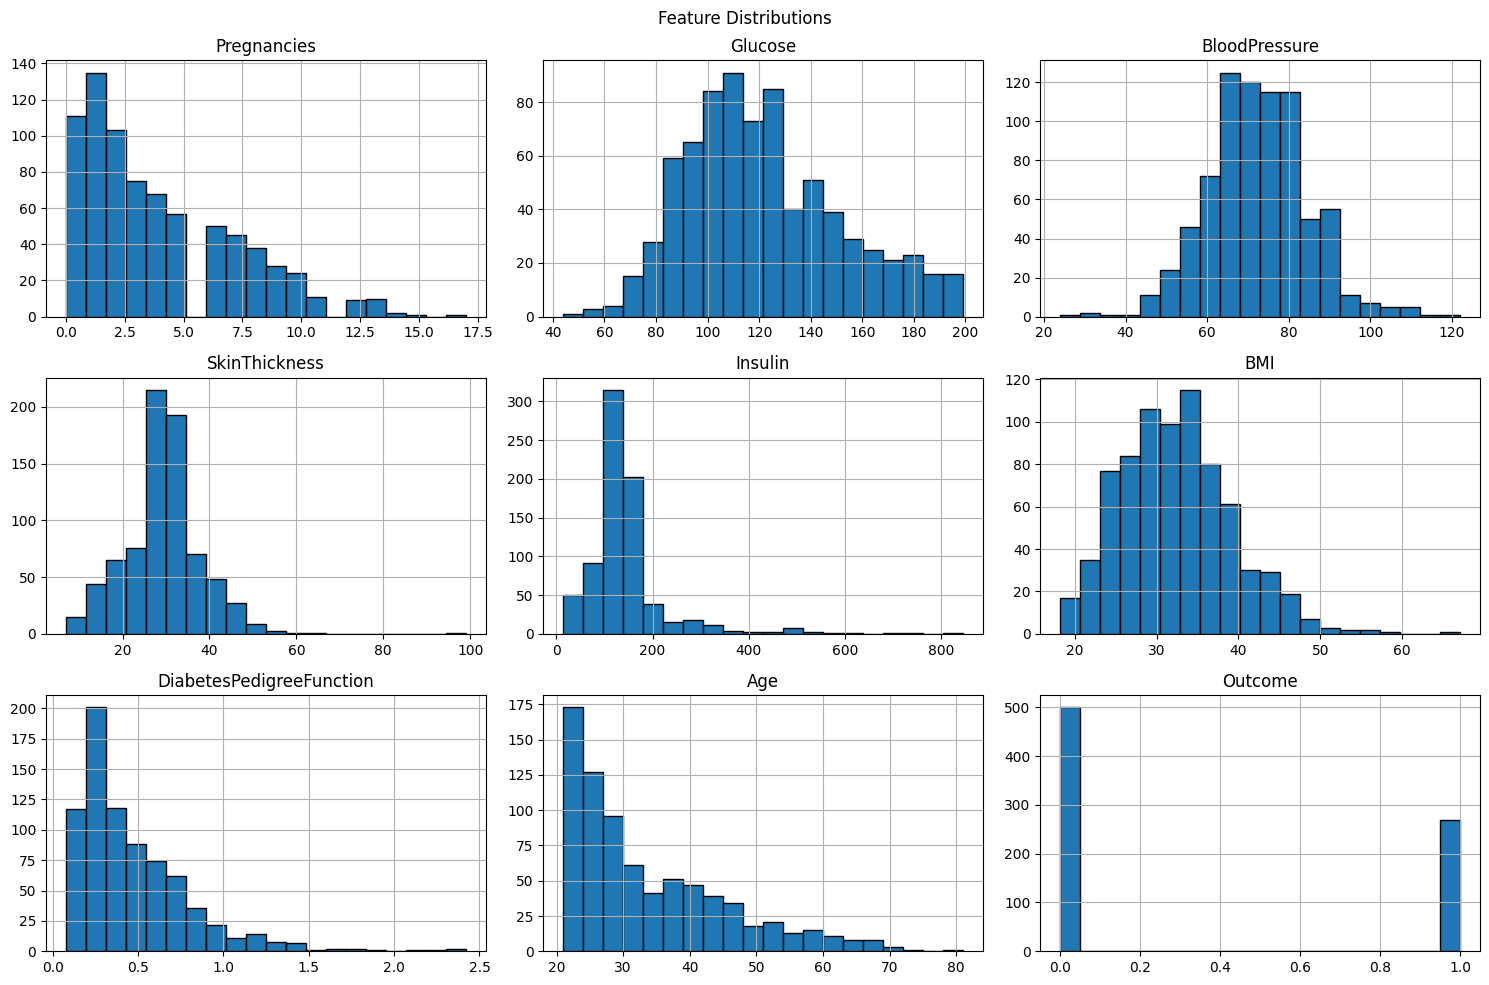

In [11]:
# --- Feature distributions ---
df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

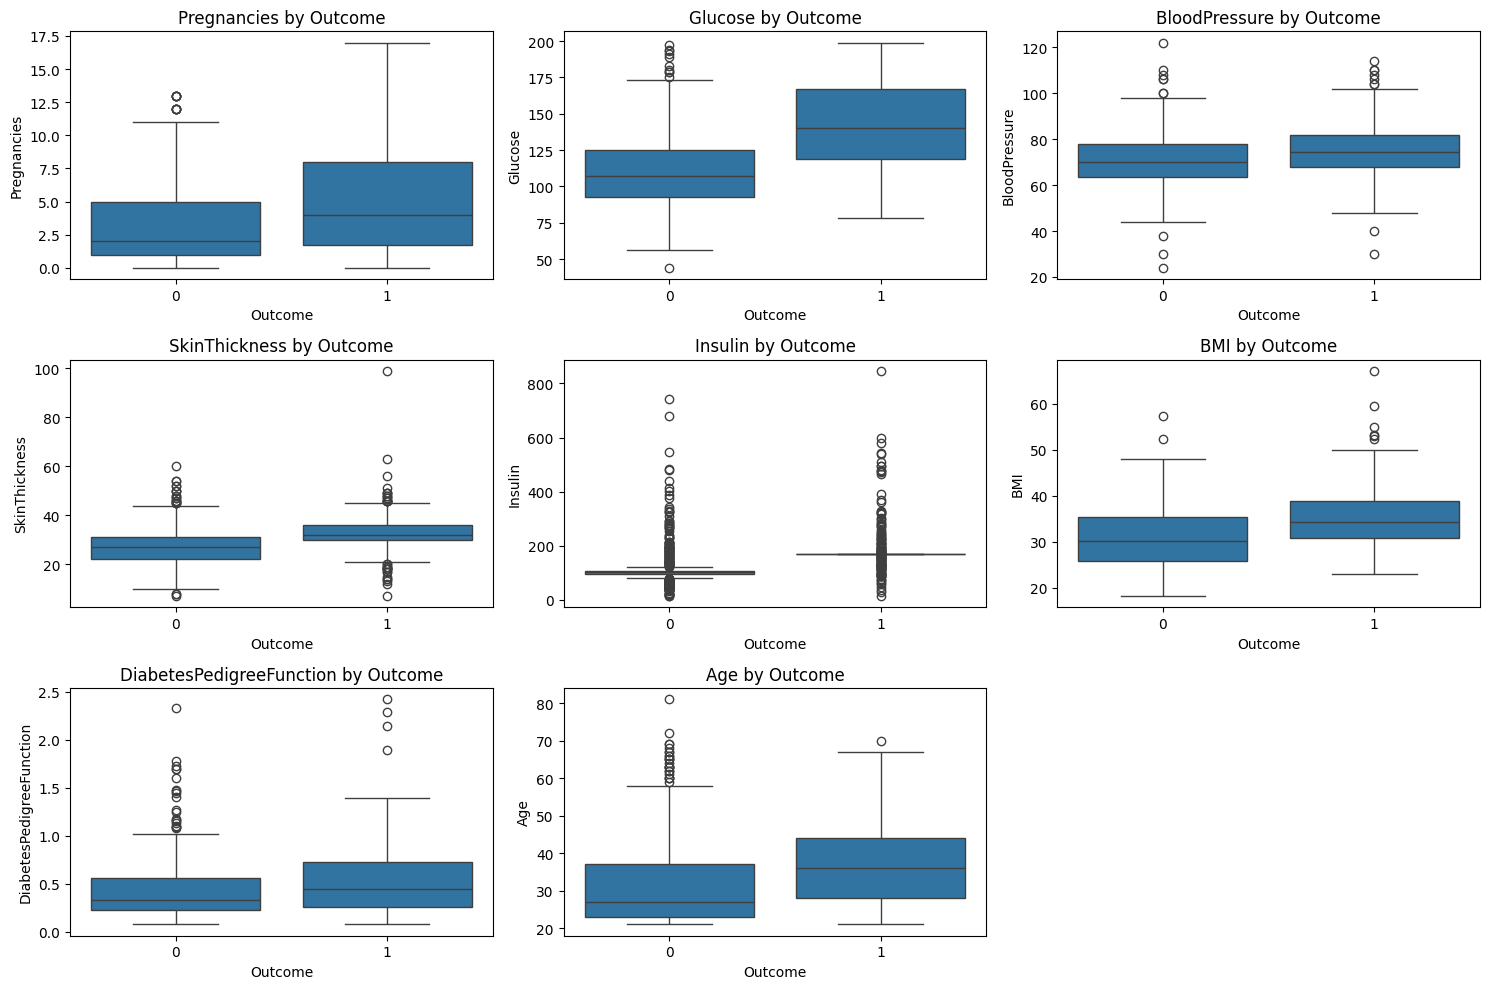

In [12]:
# --- Boxplots to visualize outliers per feature by class ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} by Outcome")
plt.tight_layout()
plt.show()

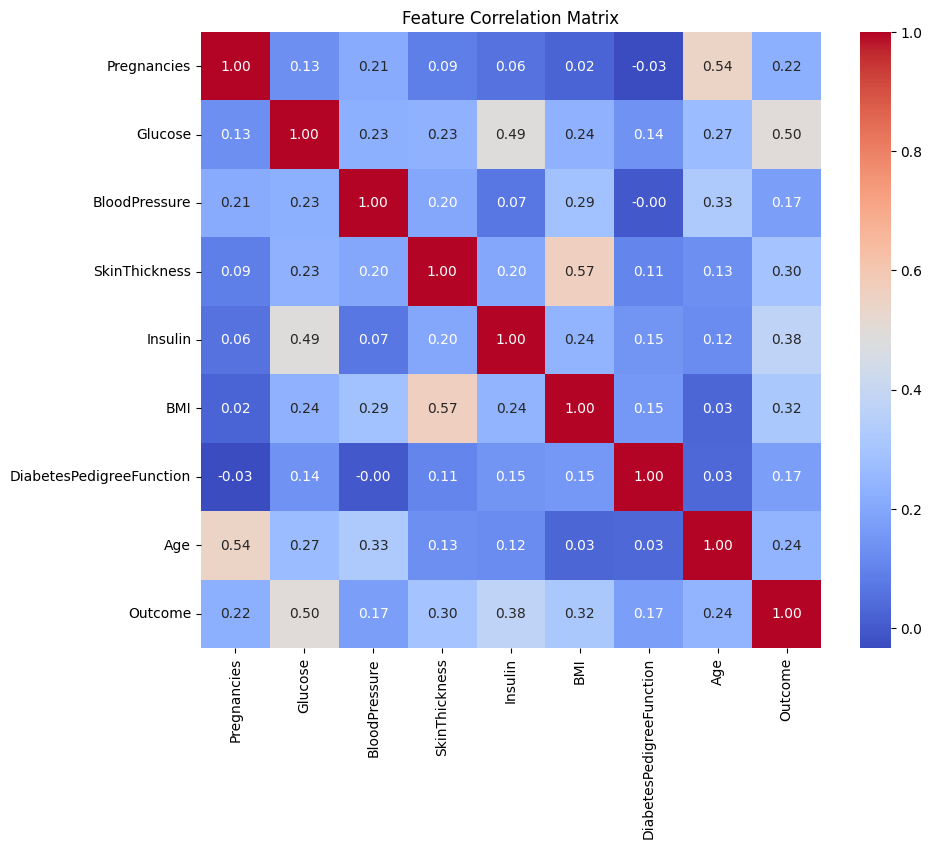


Correlation with Outcome:
Outcome                    1.00
Glucose                    0.50
Insulin                    0.38
BMI                        0.32
SkinThickness              0.30
Age                        0.24
Pregnancies                0.22
BloodPressure              0.17
DiabetesPedigreeFunction   0.17
Name: Outcome, dtype: float64


In [13]:
# --- Correlation heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

print("\nCorrelation with Outcome:")
print(df.corr()['Outcome'].sort_values(ascending=False))

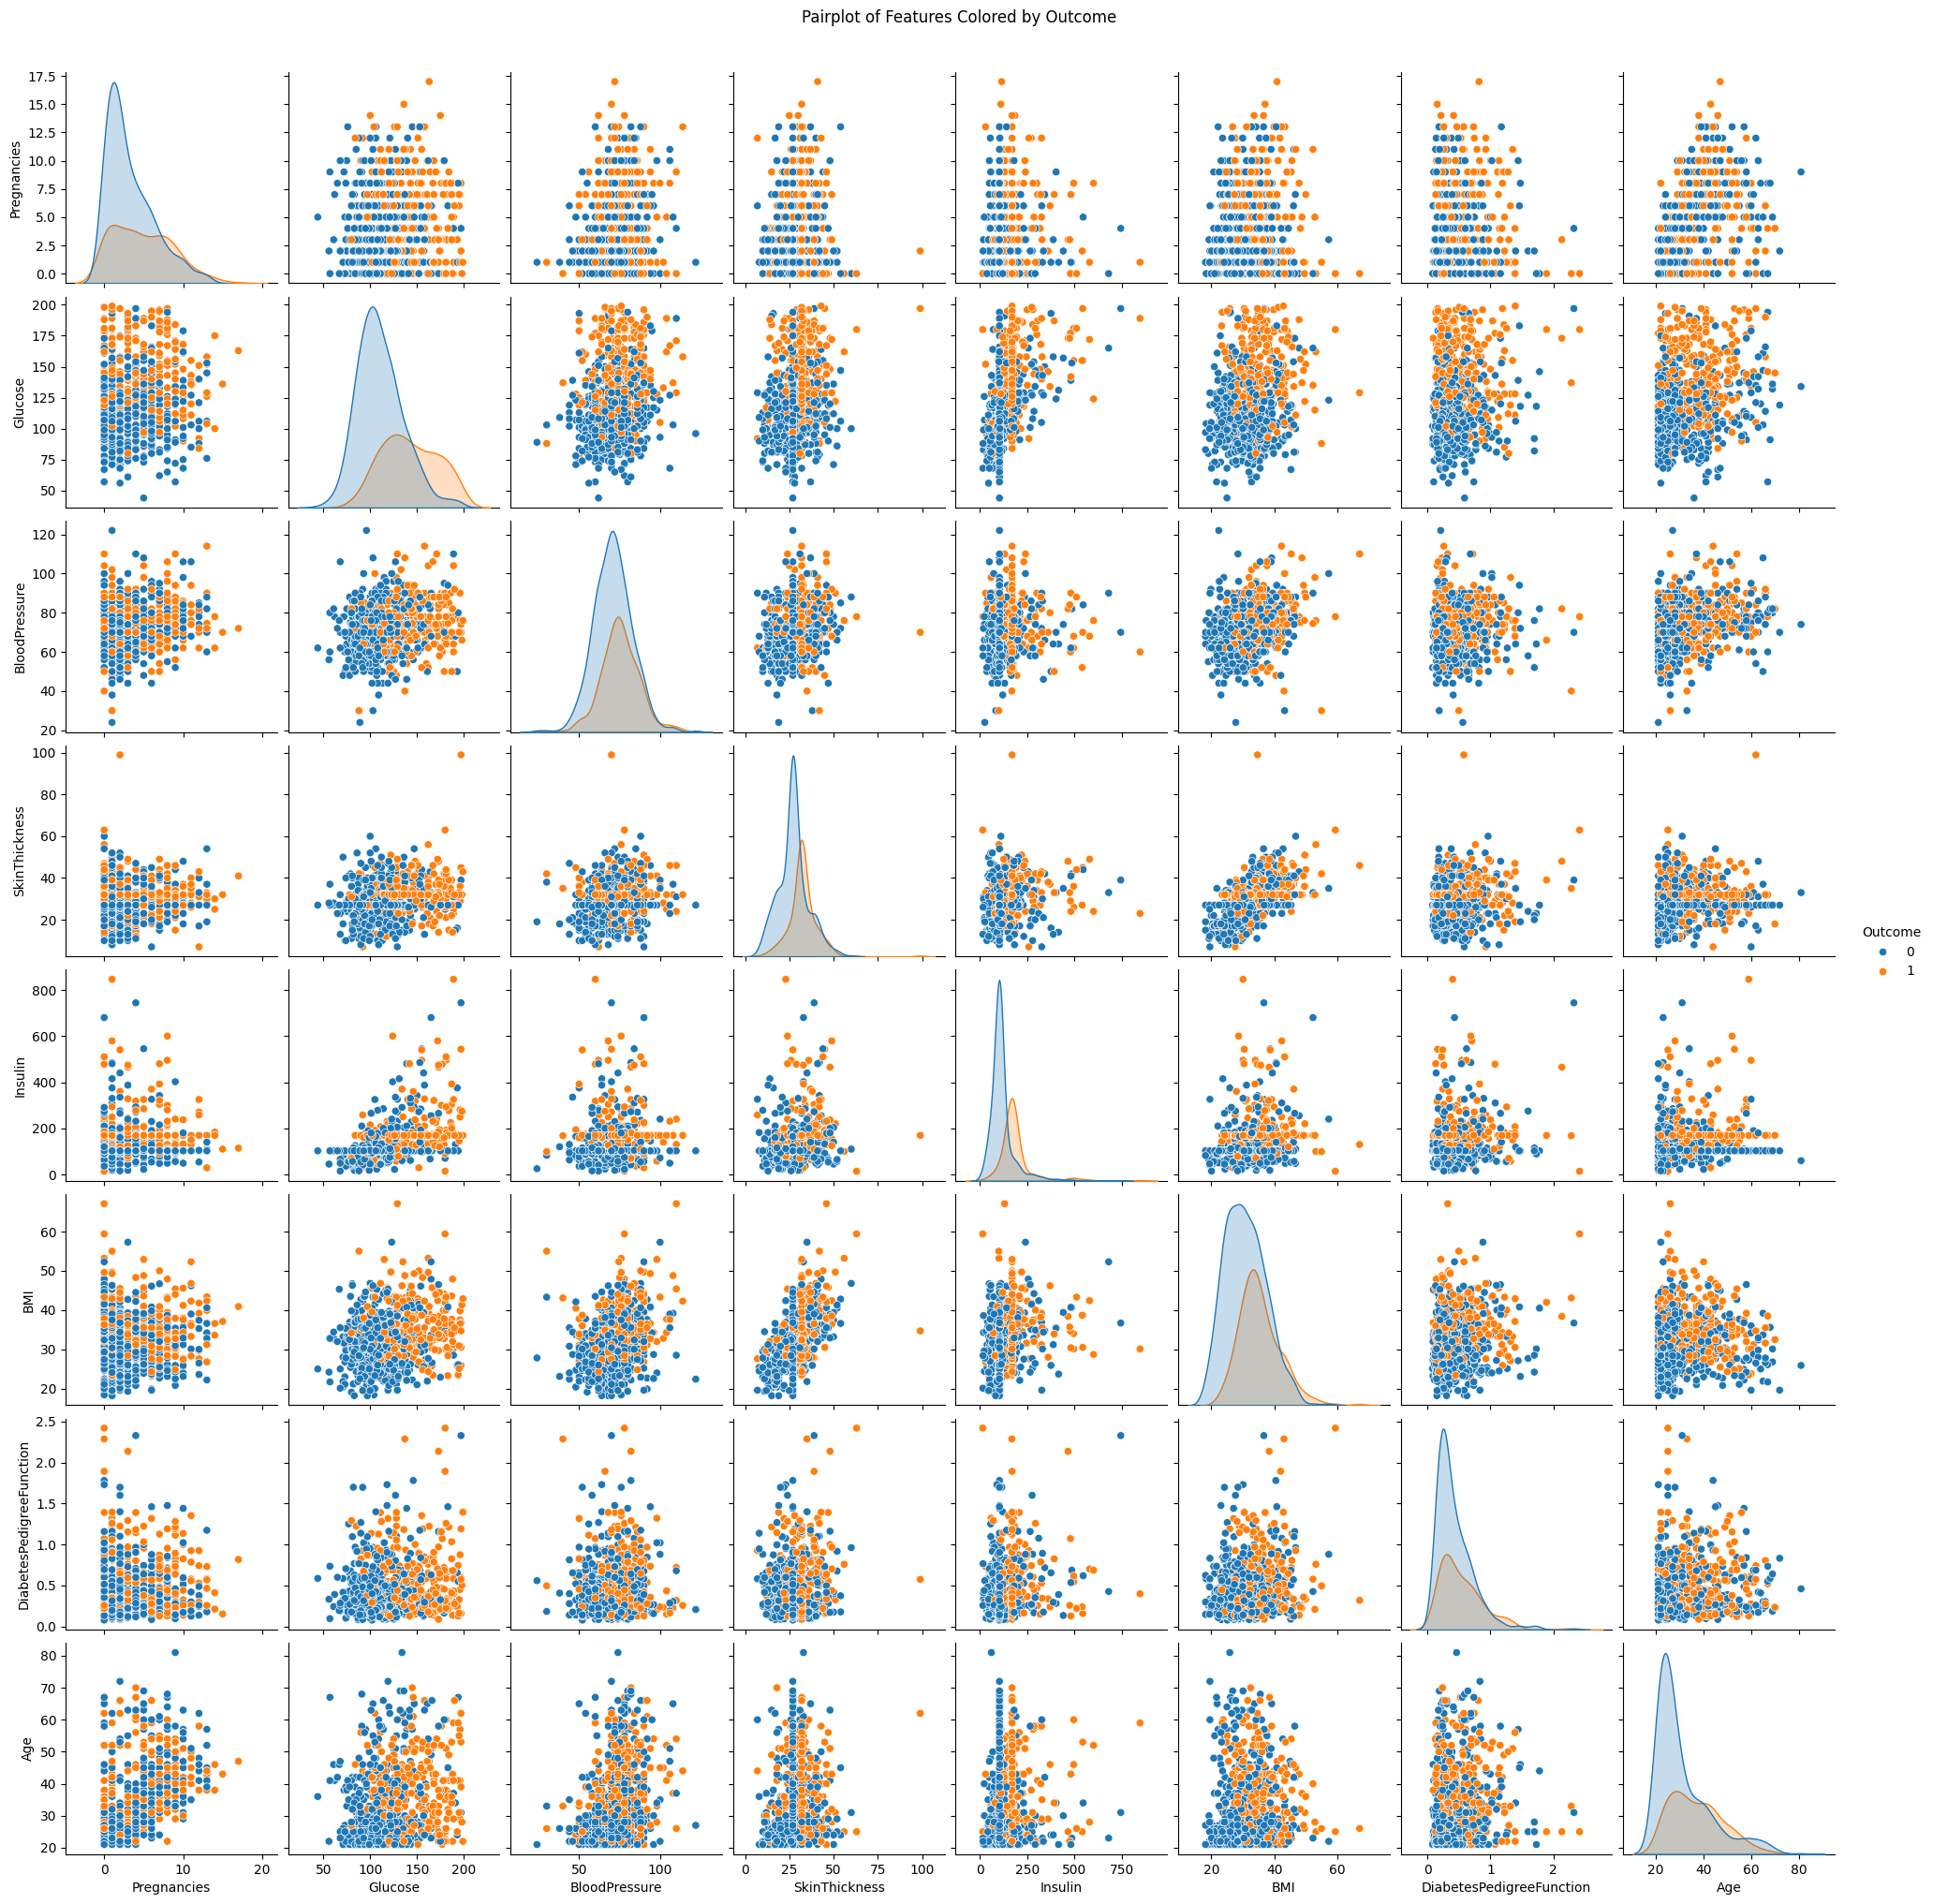

In [14]:
# --- Pairplot (Seaborn) ---
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot of Features Colored by Outcome", y=1.02)
plt.show()

In [15]:
# --- Interactive scatter matrix (Plotly) ---
fig = px.scatter_matrix(df, dimensions=df.columns[:-1], color='Outcome', title='Scatter Matrix Colored by Outcome')
fig.update_layout(width=1000, height=1000)
fig.show()

# Step 4: Feature Engineering

I create new features by combining existing ones and transform skewed features to improve model learning. Additionally, I bin continuous variables and add health indicator flags based on domain knowledge.

In [16]:
# --- Interaction Features ---
df['Glucose_Insulin'] = df['Glucose'] * df['Insulin']
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Pregnancies'] = df['Glucose'] * df['Pregnancies']

In [17]:
# --- Log-transform skewed features (Insulin and SkinThickness often skewed) ---
df['Insulin_log'] = np.log1p(df['Insulin'])
df['SkinThickness_log'] = np.log1p(df['SkinThickness'])

In [18]:
# --- Binning Age ---
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 100],
                        labels=['20s', '30s', '40s', '50s', '60s', '70s', '80+'])

In [19]:
# --- Binning Glucose levels ---
df['GlucoseLevel'] = pd.cut(df['Glucose'], bins=[0, 100, 125, 200],
                            labels=['Normal', 'Prediabetes', 'High'])

In [20]:
# --- Health flags ---
df['Is_Obese'] = (df['BMI'] >= 30).astype(int)
df['High_Glucose'] = (df['Glucose'] >= 140).astype(int)
df['High_BP'] = (df['BloodPressure'] >= 80).astype(int)

In [21]:
# Show new features sample
df[['Glucose_Insulin', 'BMI_Age', 'Glucose_Pregnancies', 'Insulin_log', 'AgeGroup', 'Is_Obese']].head()

,Glucose_Insulin,BMI_Age,Glucose_Pregnancies,Insulin_log,AgeGroup,Is_Obese
0,"25,086.00","1,680.00",888.00,5.14,40s,1
1,"8,712.50",824.60,85.00,4.64,30s,0
2,"31,018.50",745.60,"1,464.00",5.14,30s,0
3,"8,366.00",590.10,89.00,4.55,20s,0
4,"23,016.00","1,422.30",0.00,5.13,30s,1


### 🔹Feature Scaling (Standardization)

After feature engineering, we apply **StandardScaler** to ensure all features are on the same scale (mean = 0, std = 1). This is essential for algorithms like Logistic Regression, SVM, and KNN.


In [22]:
from sklearn.preprocessing import StandardScaler

# Drop target column
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Preview
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin,BMI_Age,...,AgeGroup_20s,AgeGroup_30s,AgeGroup_40s,AgeGroup_50s,AgeGroup_60s,AgeGroup_70s,AgeGroup_80+,GlucoseLevel_Normal,GlucoseLevel_Prediabetes,GlucoseLevel_High
0,0.64,0.86,-0.03,0.67,0.31,0.17,0.47,1.43,0.41,1.37,...,-1.09,-0.51,2.41,-0.28,-0.18,-0.04,-0.04,-0.61,-0.72,1.25
1,-0.84,-1.20,-0.53,-0.01,-0.44,-0.85,-0.37,-0.19,-0.62,-0.58,...,-1.09,1.97,-0.42,-0.28,-0.18,-0.04,-0.04,1.64,-0.72,-0.80
2,1.23,2.01,-0.69,0.33,0.31,-1.33,0.60,-0.11,0.78,-0.76,...,-1.09,1.97,-0.42,-0.28,-0.18,-0.04,-0.04,-0.61,-0.72,1.25
3,-0.84,-1.07,-0.53,-0.69,-0.54,-0.63,-0.92,-1.04,-0.64,-1.12,...,0.92,-0.51,-0.42,-0.28,-0.18,-0.04,-0.04,1.64,-0.72,-0.80
4,-1.14,0.50,-2.68,0.67,0.29,1.55,5.48,-0.02,0.28,0.78,...,-1.09,1.97,-0.42,-0.28,-0.18,-0.04,-0.04,-0.61,-0.72,1.25


# Step 5: Data Preparation and Train-Test Split

Finally, we prepare the dataset for modeling by encoding categorical features and splitting the dataset into stratified training and testing sets to preserve class distribution.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (614, 26)
Test shape: (154, 26)


In [24]:
# Save processed data splits
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)
print("✅ Data splits saved.")

✅ Data splits saved.


# 🧠 Step 3: Model Training
We train multiple machine learning models, evaluate them using cross-validation, compare performance metrics, and save the best-performing model for future use.



## 🔹 3.1 Import Required Libraries

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib

## 3.2 Initialize Models

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

## 3.3 Cross-Validation and Metric Comparison

In [27]:
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation (5-fold)
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # Save results
    results[name] = {
        "Mean Accuracy": accuracy.mean(),
        "Mean F1 Score": f1.mean()
    }


Training Logistic Regression...

Training Random Forest...

Training SVM...


## 3.4 Compare Models

In [28]:
print("\n📊 Model Performance Comparison:")
for model, scores in results.items():
    print(f"{model}: Accuracy = {scores['Mean Accuracy']:.4f}, F1 Score = {scores['Mean F1 Score']:.4f}")


📊 Model Performance Comparison:
Logistic Regression: Accuracy = 0.8208, F1 Score = 0.7286
Random Forest: Accuracy = 0.8811, F1 Score = 0.8267
SVM: Accuracy = 0.8224, F1 Score = 0.7237


## 🔹 3.5 Select Best Model

In [29]:
# Select model with highest F1 Score (can change metric based on your use case)
best_model_name = max(results, key=lambda x: results[x]["Mean F1 Score"])
best_model = models[best_model_name]

# Train on full training set
best_model.fit(X_train, y_train)

print(f"\n✅ Best Model Selected: {best_model_name}")


✅ Best Model Selected: Random Forest


## 🔹 3.6 Save Trained Model

In [30]:
# Save model using joblib
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")

print(f"💾 Saved as: {best_model_name.replace(' ', '_').lower()}_model.pkl")

💾 Saved as: random_forest_model.pkl
